<a href="https://colab.research.google.com/github/theakash07/Machine_learning/blob/main/Survival_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
#thi is for importing gooogle drive whrer the data is stored.
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [4]:
#accessing the data using path of my csv file and storing it in the df variable
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COllab data files/Titanic-Dataset.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail(5) #it's for output of last five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now we need to clean the data and have to remove the features which are not necessary for the prediction of this model.


In [8]:
df.describe() #describe the whole columns of this data frame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df1=df.copy() # copying the data frame to the new datafram it will keep the original data safe.

I'm taking mean of the whole Ages and putting it at the null places.

In [10]:
df1['Age'].info() #Shows info regarding the age column

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [11]:
df1['Age'].describe() #the mean of the age is 29.69

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We found the mean of the age and rn i'm putting those values at the null places of ages


In [12]:
df1['Age'].isnull().sum()
#Number of total values which are null in the data set of the age

177

In [21]:
mean_age = df1['Age'].mean() #the mean age
print(mean_age)
max=df1['Age'].max()
min=df1['Age'].min()
range=max-min
print(f"The range of the data age is {range}")
print(f"The max of Age {max} and the minimum age is {min}")
q1= df1['Age'].quantile(0.25)
q2=df1['Age'].quantile(0.75)
iqr=q2-q1
print("The inter quantile range is : ", iqr)
#Now we are filling the blank spaces of column with the min age of age column it is good pracise only when there is no outliers.
df1['Age'].fillna(mean_age, inplace=True) #because all the values become float values so need to covnert into the integer again

df1['Age']=df1['Age'].astype(int)

29.69911764705882
The range of the data age is 79.58
The max of Age 80.0 and the minimum age is 0.42
The inter quantile range is :  13.0


In [22]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


so successfully we have inseted the mean of the ages at the null places

In [23]:
df1['Age'].isnull().sum() #you can see there is not such null values for the age in the data set

0

Now Moving further and remvoing all the features which are not important to move with.
I'm removing the columns like **Cabin**,**Ticket**,**Embarked**

In [24]:
#making a copy of the current data set to keep intact the data set at all the stages
df2=df1.copy()
df2=df1.drop(['Cabin'], axis=1)
df2.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


Now gonna plot the the graph of survival respect to class(in which peopel living)

<function matplotlib.pyplot.show(close=None, block=None)>

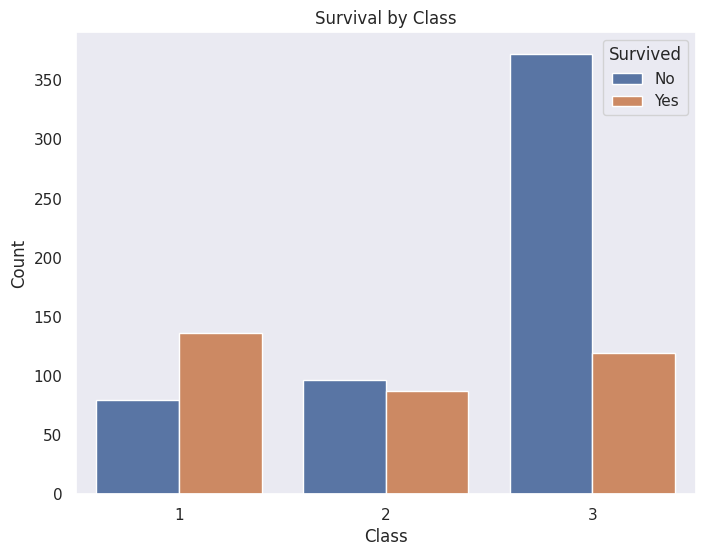

In [27]:
import seaborn as sns #advance form of matplotlib
import matplotlib.pyplot as plt

sns.set(style="darkgrid") # This command is used to set the background color.
plt.figure(figsize=(8, 6)) # used for only the figure size changes.....
sns.countplot(data=df2, x='Pclass', hue='Survived')

#adding the label
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show


You can clearly see in the above graph that most of people who belongs to 3rd class have died.


Now gonna draw a scatterplot graph of survival respect to Age


In [30]:
df2['Survived'].value_counts() #it will count the amount of survival on the basis of 0 and 1

0    549
1    342
Name: Survived, dtype: int64

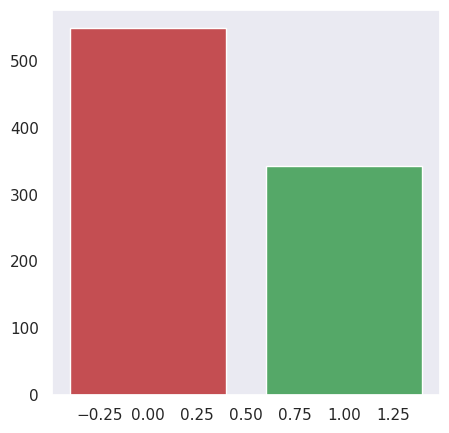

In [31]:
plt.figure(figsize=(5,5))
plt.bar(list(df2['Survived'].value_counts().keys()), list(df2['Survived'].value_counts()), color=['r','g'])
plt.show()

In [32]:
df2['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

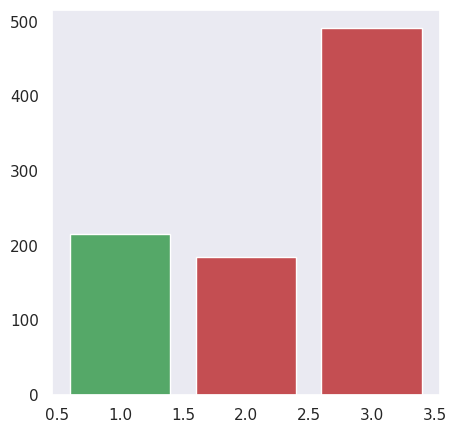

In [33]:
# Assuming df2 is your DataFrame
# Create a figure with a 5x5 inch size
plt.figure(figsize=(5, 5))

# Create a bar plot using the 'Pclass' column from df2
# 'Pclass' values are on the x-axis, their counts are on the y-axis
# Use 'r' (red) for the first bar and 'g' (green) for the second bar
plt.bar(list(df2['Pclass'].value_counts().keys()), list(df2['Pclass'].value_counts()), color=['r', 'g'])

# Display the plot
plt.show()


In [34]:
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df2['Embarked'].mode() #finding the most frequent value which in embarked column(variable)

0    S
Name: Embarked, dtype: object

In [ ]:
#replacing the empty cells with the mode of Embarked section
df2['Embarked'].fillna(df2['Embarked'].mode()[0], inplace=True)

In [ ]:
df2.isnull().sum() #just checing the empty values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df2.describe() #some statistical measure of the data frame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#counting the values of survived and not survived
df2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

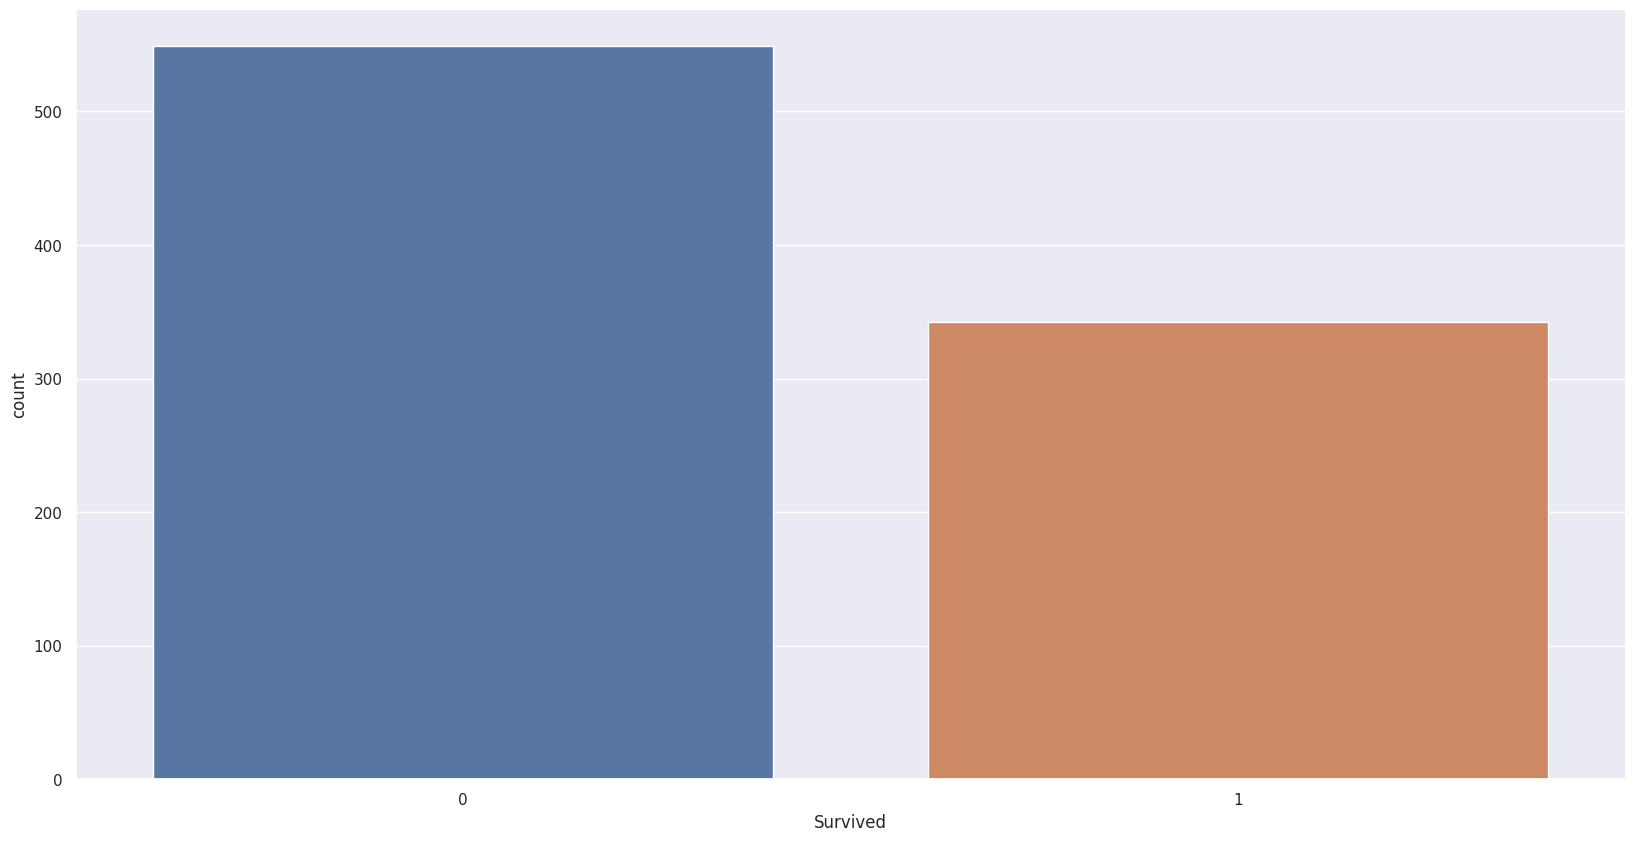

In [ ]:
#counting the survival via visualisation
sns.set()
sns.countplot(x='Survived', data=df2)

<Axes: xlabel='Sex', ylabel='count'>

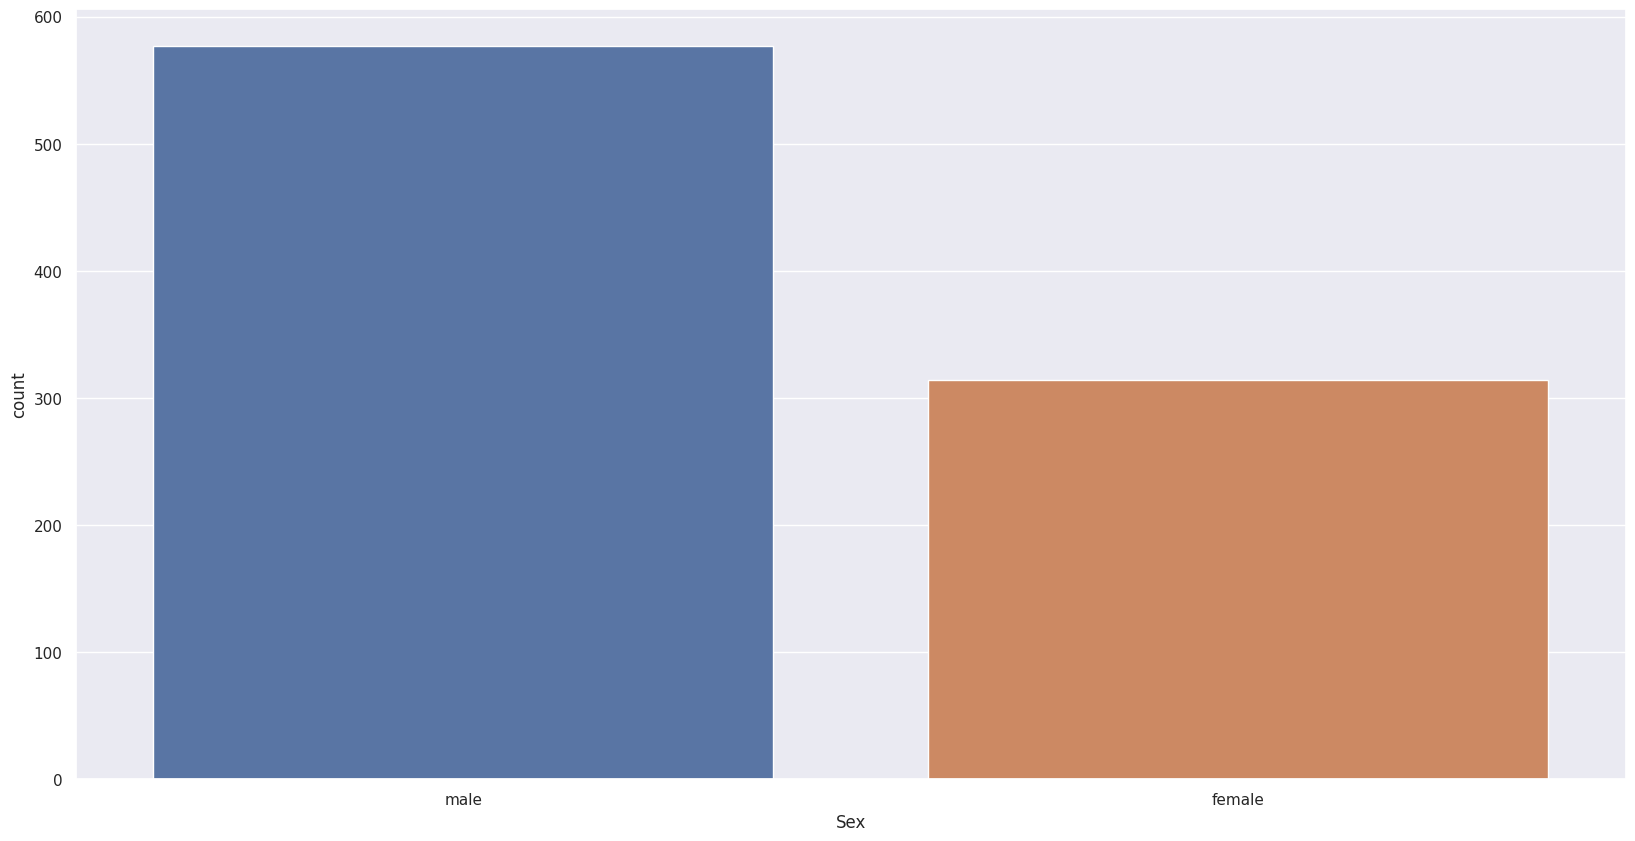

In [ ]:
#counting the gender wise survival
sns.countplot(x='Sex', data=df2)

In [ ]:
df2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

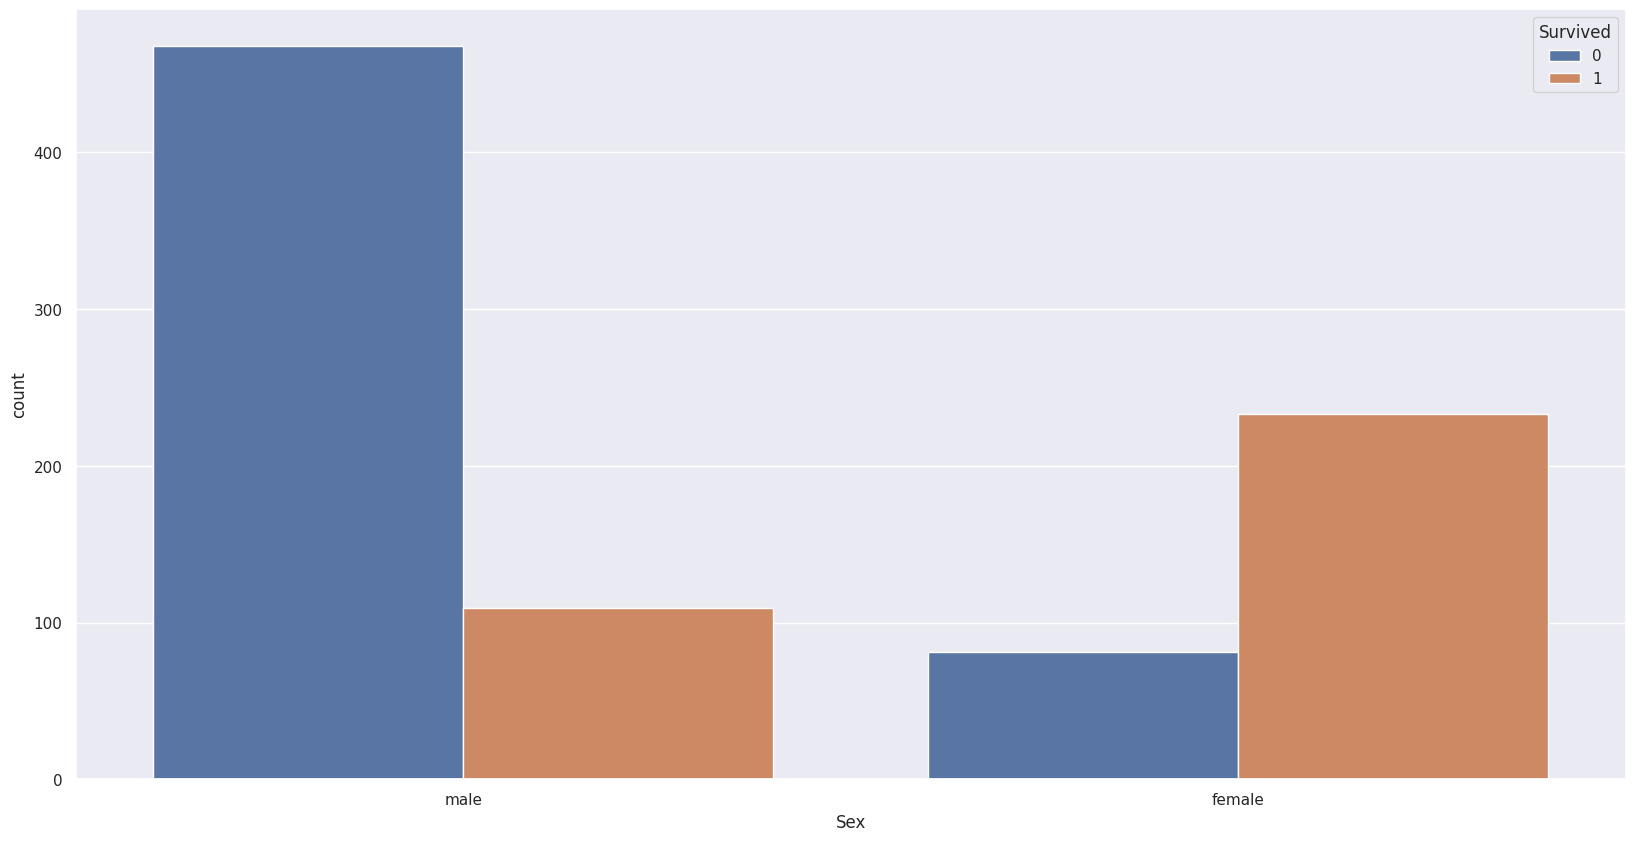

In [ ]:
# Number of survivors gender wise
sns.countplot(x='Sex', hue='Survived', data=df2)

<Axes: xlabel='Pclass', ylabel='count'>

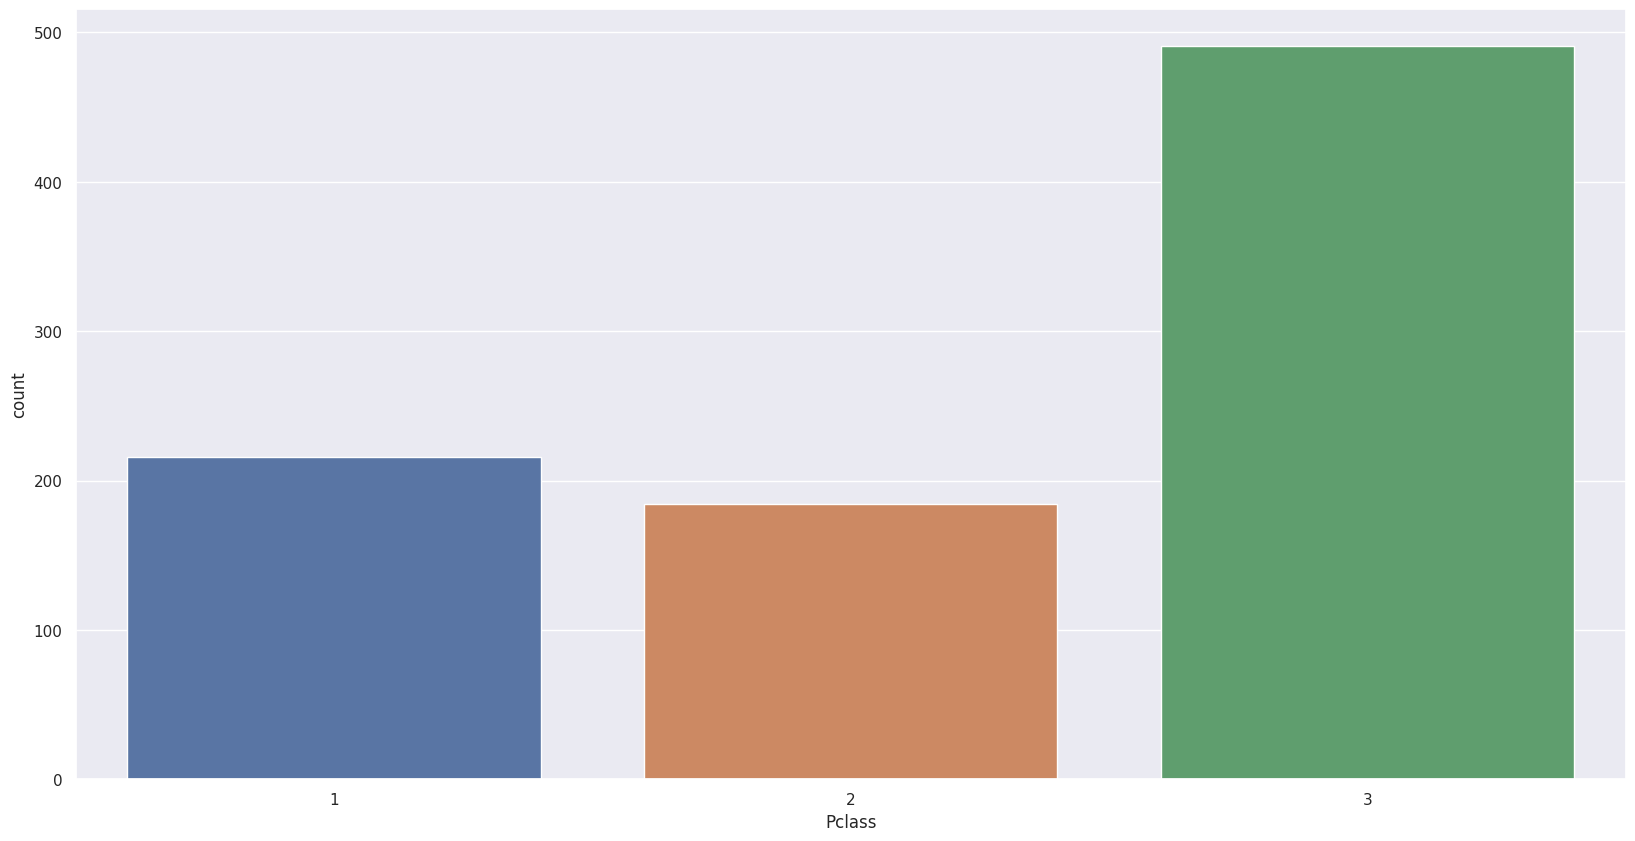

In [ ]:
# Number of survivors gender wise
sns.countplot(x='Pclass', data=df2)

<Axes: xlabel='Pclass', ylabel='count'>

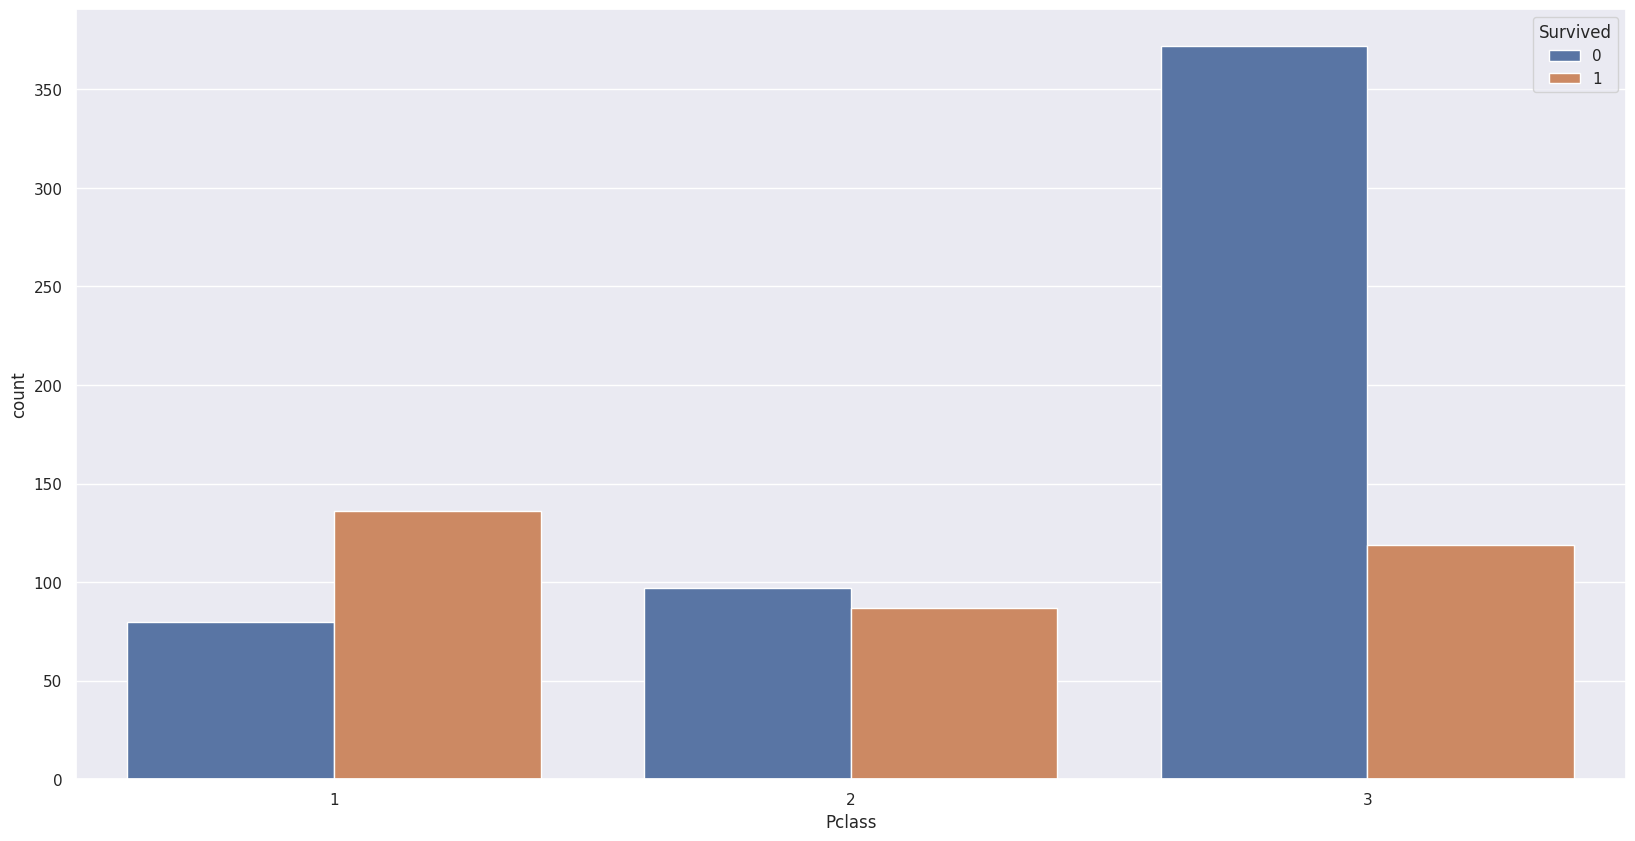

In [ ]:
# Number of people survived based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df2)

In [ ]:
#now encoding the categorical column
df2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df2['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#converting categorical column
df2.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


Now seprating features and target

In [ ]:
x = df2.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y=df2['Survived']
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data and test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
